## Description

Hyperparameter tuning for CNN trained on Combined/LaFleur_supp.csv, using the absolute Observed log(TX/Txref). It splits the data into training, testing, and validation datasets. 

In [1]:
from CNN_7_0 import *

In [2]:
# Documentation variables
name = 'CNN_7_0'
model_path = f'../Models/{name}.keras'
data_path = '../Data/Combined/LaFleur_supp.csv'
search_dir = '../Testing CNN/Hyperparameter Search'

# Hyperparameter tuning variables
max_trials = 30

# Unoptimized training Hyperparameters
loss = 'mean_squared_error'
epochs = 100
batch_size = 32

# Hyperparameter ranges dictionary
hyperparam_ranges = {
    'num_layers': (1, 3),
    'filters': [32, 64, 128],
    'kernel_size': [2, 3, 4, 5, 6, 8],
    'strides': [1, 2],
    'pool_size': [2, 3],
    'activation': ['relu', 'tanh'],
    'dense_units': (32, 128, 32),
    'learning_rate': (1e-4, 1e-2)
}

In [3]:
X, y = load_features(data_path)
# Split into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [4]:
# Perform Bayesian Optimization
best_model = train_best_model(name, search_dir, X_train, y_train, X_val, y_val,
                              X_train.shape[1:], loss, max_trials, epochs, batch_size, hyperparam_ranges)

# Save the best model
best_model.save(model_path)

Trial 30 Complete [00h 05m 52s]
val_loss: 0.002614266239106655

Best val_loss So Far: 0.0022160003427416086
Total elapsed time: 05h 38m 50s


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
# Load, predict, and evaluate the best model
y_pred = load_and_predict(model_path, X_test)
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
MSE:  0.002227560124679767
RMSE:  0.047197035125945856
MAE:  0.030095421167607436
R2:  0.8812623413763445


In [6]:
print(min(y_pred['Value']), max(y_pred['Value']))

0.055035755038261414 0.7684050798416138


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step


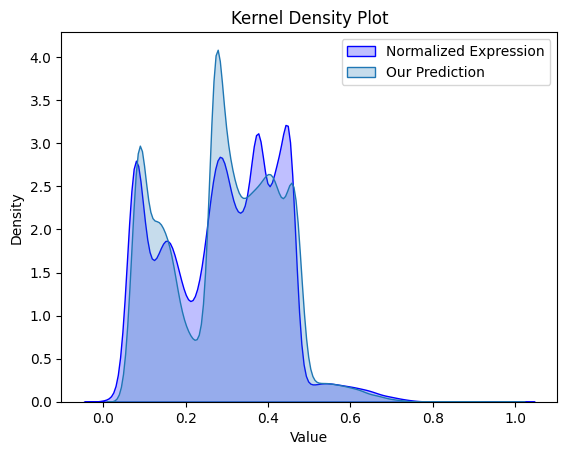

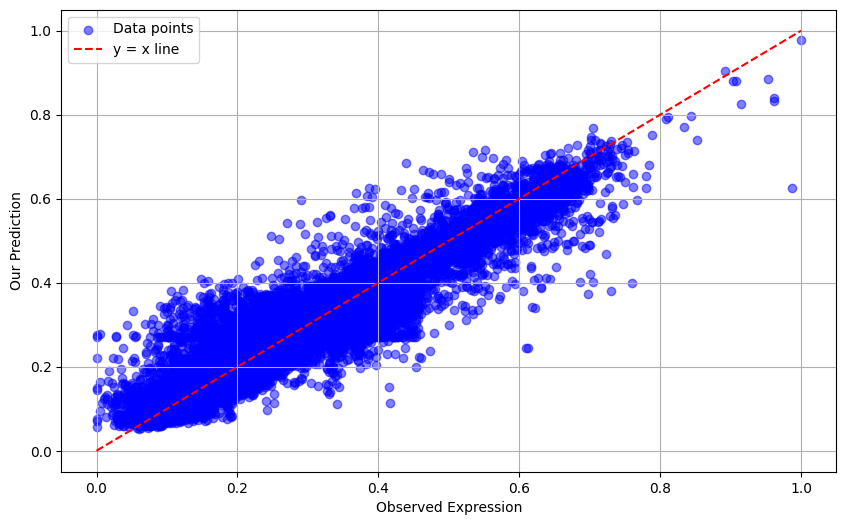

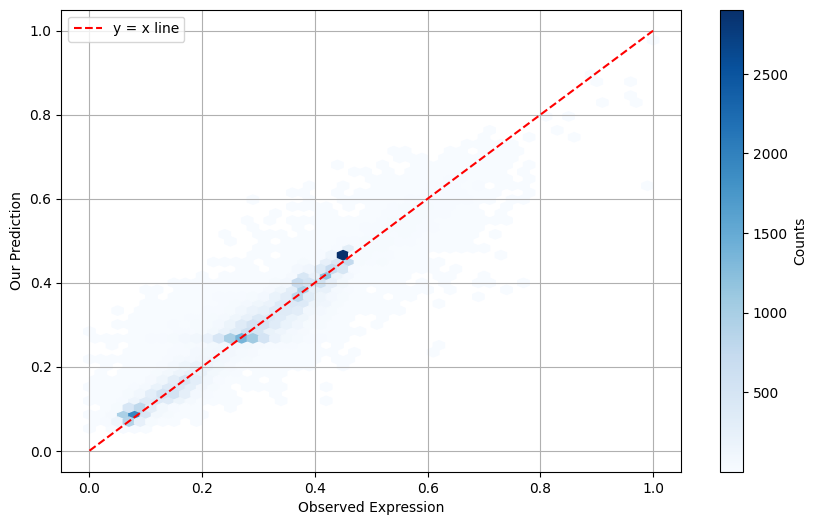

In [7]:
df = pd.read_csv(data_path)
df['Normalized Expression'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

predicted = load_and_predict(model_path, X)
observed = df['Normalized Expression'].values

plot_kde(df, predicted)
plot_scatter(observed, np.ravel(predicted))
plot_hexbin(observed, np.ravel(predicted))

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step


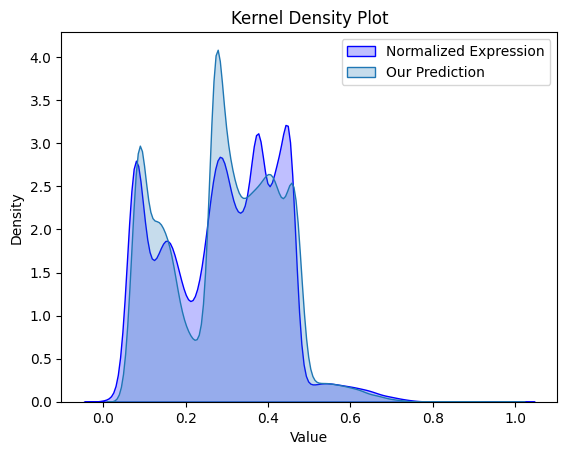

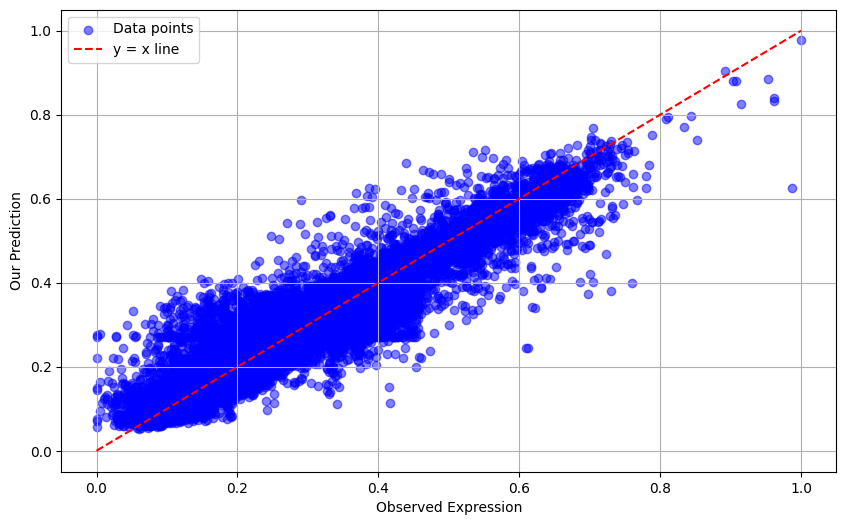

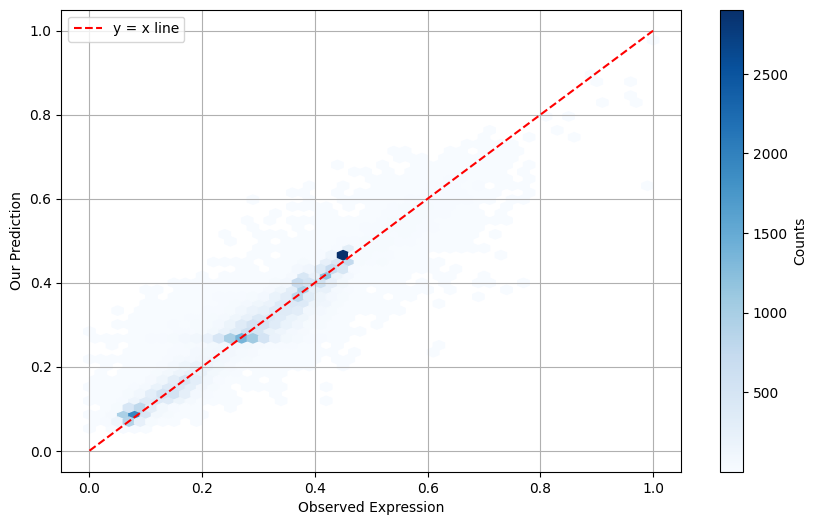

In [8]:
df = pd.read_csv(data_path)
df['Normalized Expression'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

predicted = load_and_predict(model_path, X)
observed = df['Normalized Expression'].values

plot_kde(df, predicted)
plot_scatter(observed, np.ravel(predicted))
plot_hexbin(observed, np.ravel(predicted))

In [9]:
model = load_model(model_path)
model.summary()

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 73, 128)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,965 (628.77 KB)

 Trainable params: 53,441 (208.75 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 106,884 (417.52 KB)

In [10]:
model.save(model_path.replace('.keras', '.hdf5'))